In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('./Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Setting X equal to annual income
X = data.iloc[:, [3,4]].values

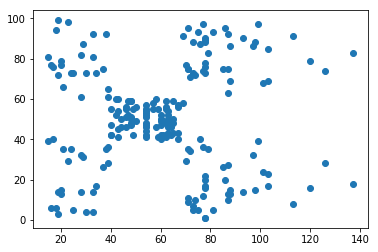

In [5]:
plt.scatter(x=X[:,0],y=X[:,1])

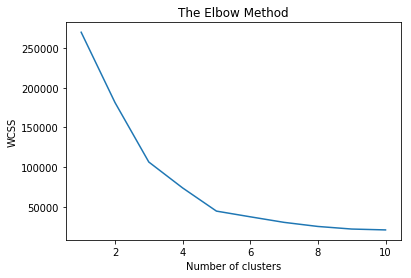

In [6]:
# using the elbow method to find optimal number of clusters 
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init=10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
#applying k-means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init=10, random_state = 0)
# init='k-means++' this is the best option
# init='random'
y_kmeans = kmeans.fit_predict(X) # fit and predict at the same time

In [8]:
X[y_kmeans == 0]

array([[ 70,  29],
       [ 71,  11],
       [ 71,   9],
       [ 73,   5],
       [ 73,   7],
       [ 74,  10],
       [ 75,   5],
       [ 77,  12],
       [ 77,  36],
       [ 78,  22],
       [ 78,  17],
       [ 78,  20],
       [ 78,  16],
       [ 78,   1],
       [ 78,   1],
       [ 79,  35],
       [ 81,   5],
       [ 85,  26],
       [ 86,  20],
       [ 87,  27],
       [ 87,  13],
       [ 87,  10],
       [ 88,  13],
       [ 88,  15],
       [ 93,  14],
       [ 97,  32],
       [ 98,  15],
       [ 99,  39],
       [101,  24],
       [103,  17],
       [103,  23],
       [113,   8],
       [120,  16],
       [126,  28],
       [137,  18]], dtype=int64)

In [9]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

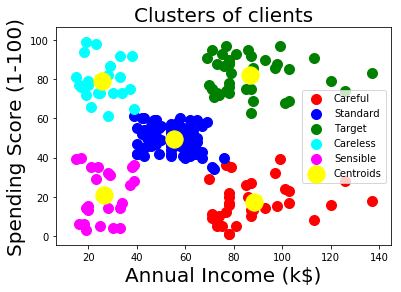

In [10]:
# visualizing the clusters
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Sensible')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of clients',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.show()